In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
file_path = "/content/drive/MyDrive/dataset/archive /captions.txt"  # Replace with your file path
try:
    with open(file_path, "r") as file:
        for line in file:
            print(line.strip())
except FileNotFoundError:
    print(f"The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Streaming output truncated to the last 5000 lines.
3264937930_9623496b64.jpg,A group of people climb into a hot air balloon .
3264937930_9623496b64.jpg,A hot-air balloon getting filled .
3264937930_9623496b64.jpg,People gathered around a hot air balloon in the process of inflating .
3265162450_5b4e3c5f1b.jpg,Three dogs are running down a snow covered hill .
3265162450_5b4e3c5f1b.jpg,Three dogs race in the snow together .
3265162450_5b4e3c5f1b.jpg,Three dogs running through the snow .
3265162450_5b4e3c5f1b.jpg,Three dogs walk together across a snowy field .
3265162450_5b4e3c5f1b.jpg,Two mostly white dogs are in the snow with a black and red dog .
3265209567_b3b9c8e0fe.jpg,A brown and white dog walks behind a brown cow .
3265209567_b3b9c8e0fe.jpg,A dog is running past a farm animal nearby a fence diving tall and short grass .
3265209567_b3b9c8e0fe.jpg,A dog running along beside a cow in a grassy field .
3265209567_b3b9c8e0fe.jpg,Dog and cow in field .
3265209567_b3b9c8e0fe.jpg,The brown 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
pip install Pillow


In [ ]:
from PIL import Image
image_path = "/content/drive/MyDrive/dataset/archive /Images.jpg"
try:
    image = Image.open(image_path)
    image.show()
except FileNotFoundError:
    print(f"The image file '{image_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

The image file '/content/drive/MyDrive/dataset/archive /Images.jpg' was not found.


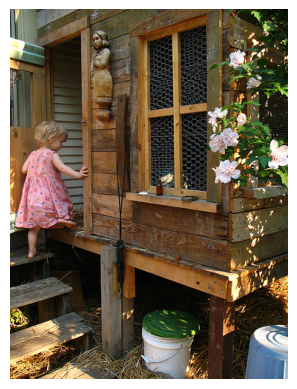

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = "/content/drive/MyDrive/dataset/archive /Images/1000268201_693b08cb0e.jpg"
try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print(f"The image file '{image_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [ ]:
BASE_DIR = '/content/drive/MyDrive/dataset/archive '

In [ ]:
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# summarize
print(model.summary())

553467096/553467096 [==============================] - 6s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
features = {}
directory = os.path.join(BASE_DIR, 'Images')

for img_name in tqdm(os.listdir(directory)):
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    feature = model.predict(image, verbose=0)
    image_id = img_name.split('.')[0]
    features[image_id] = feature

  0%|          | 0/8091 [00:00<?, ?it/s]

In [ ]:
with open(os.path.join(BASE_DIR, 'captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [ ]:
mapping = {}
for line in tqdm(captions_doc.split('\n')):
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    image_id = image_id.split('.')[0]
    caption = " ".join(caption)
    if image_id not in mapping:
        mapping[image_id] = []
    mapping[image_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

In [ ]:
len(mapping)

8091

In [ ]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
          caption = captions[i]
        caption = caption.lower()
        caption = caption.replace('[^A-Za-z]', '')
        caption = caption.replace('\s+', ' ')
        caption = 'startseq ' + " ".join([word for word in         caption.split() if len(word)>1]) + ' endseq'
        captions[i] = caption

In [ ]:
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [ ]:
clean(mapping)

In [ ]:
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [ ]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [ ]:
len(all_captions)

40455

In [ ]:
all_captions[:10]

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'A black dog and a spotted dog are fighting',
 'A black dog and a tri-colored dog playing with each other on the road .',
 'A black dog and a white dog with brown spots are staring at each other in the street .',
 'Two dogs of different breeds looking at each other on the road .',
 'startseq two dogs on pavement moving toward each other endseq']

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

8496

In [ ]:
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

In [ ]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [ ]:
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            for caption in captions:
                seq = tokenizer.texts_to_sequences([caption])[0]
                for i in range(1, len(seq)):
                  in_seq, out_seq = seq[:i], seq[i]
                  in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                  out_seq = to_categorical([out_seq],
                  num_classes=vocab_size)[0]
                  X1.append(features[key][0])
                  X2.append(in_seq)
                  y.append(out_seq)
            if n == batch_size:
              X1, X2, y = np.array(X1), np.array(X2), np.array(y)
              yield [X1, X2], y
              X1, X2, y = list(), list(), list()
              n = 0

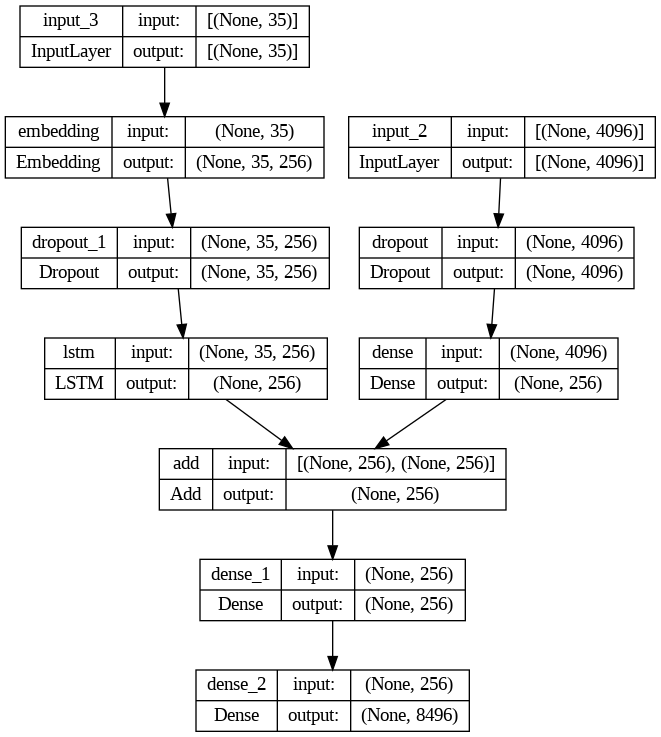

In [ ]:

inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')
plot_model(model, show_shapes=True)

In [ ]:
epochs = 5
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

227/227 [==============================] - 1200s 5s/step - loss: 2.9905


In [ ]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
          return word
    return None

In [ ]:
def predict_caption(model, image, tokenizer, max_length):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)
        yhat = model.predict([image, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idx_to_word(yhat, tokenizer)
        if word is None:
            break
        in_text += " " + word
        if word == 'endseq':
            break
    return in_text

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
actual, predicted = list(), list()

for key in tqdm(test):
    captions = mapping[key]
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    actual.append(actual_captions)
    predicted.append(y_pred)
    print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/810 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

BLEU-1: 0.111111
BLEU-2: 0.000000
BLEU-1: 0.217391
BLEU-2: 0.099405
BLEU-1: 0.311475
BLEU-2: 0.179504
BLEU-1: 0.324324
BLEU-2: 0.166731
BLEU-1: 0.345679
BLEU-2: 0.178434
BLEU-1: 0.320755
BLEU-2: 0.169906
BLEU-1: 0.336134
BLEU-2: 0.173240
BLEU-1: 0.351562
BLEU-2: 0.187500
BLEU-1: 0.355072
BLEU-2: 0.189163
BLEU-1: 0.394558
BLEU-2: 0.221268
BLEU-1: 0.416667
BLEU-2: 0.233662
BLEU-1: 0.429412
BLEU-2: 0.238901
BLEU-1: 0.446927
BLEU-2: 0.237779
BLEU-1: 0.447917
BLEU-2: 0.240576
BLEU-1: 0.447761
BLEU-2: 0.240366
BLEU-1: 0.436019
BLEU-2: 0.231655
BLEU-1: 0.454545
BLEU-2: 0.241283
BLEU-1: 0.461207
BLEU-2: 0.245652
BLEU-1: 0.464730
BLEU-2: 0.246390
BLEU-1: 0.464567
BLEU-2: 0.239947
BLEU-1: 0.469925
BLEU-2: 0.247746
BLEU-1: 0.469091
BLEU-2: 0.243581
BLEU-1: 0.473498
BLEU-2: 0.241406
BLEU-1: 0.472603
BLEU-2: 0.241234
BLEU-1: 0.478261
BLEU-2: 0.243611
BLEU-1: 0.485342
BLEU-2: 0.245870
BLEU-1: 0.482650
BLEU-2: 0.241352
BLEU-1: 0.483180
BLEU-2: 0.244523
BLEU-1: 0.460674
BLEU-2: 0.228309
BLEU-1: 0.4630

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
A boy is putting the cone end of a melting ice cream cone in his mouth .
A boy with his eyes closed eats the bottom of an ice cream cone .
A young boy eating ice cream .
A young boy wearing a big watch eats an ice cream cone .
startseq little boy is eating the rest of the ice cream cone from the bottom up endseq
--------------------Predicted--------------------
startseq the elderly boy is eating the ice cone endseq


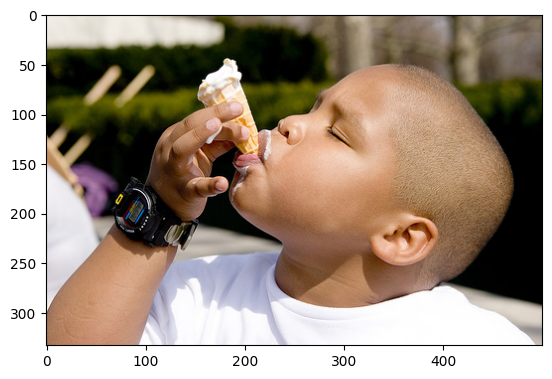

In [ ]:
generate_caption("382151094_c7376cf22b.jpg")